In [1]:
from collections import defaultdict
import math
import numpy as np
from numpy import ma
import datetime, time
from datetime import datetime
import netCDF4
from netCDF4 import Dataset, num2date
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline

import pickle
import halem
import datetime, time
import numpy as np
timeQ = time

"disable functions below if cartopy is unavailable"
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import halem
import flow_class
import os

from pytides.tide import Tide
from pandas import DataFrame

from IPython.display import clear_output
from scipy.spatial import Delaunay

In [2]:
start_time = timeQ.time()

flow = flow_class.flow_tidal_analysis()

stop_time = timeQ.time()
computation_time = stop_time - start_time
print("the computational time is:", round(computation_time,2), "sec")

(361, 5287)


C:\Users\D4L\OneDrive - Van Oord\Use case Schouwen\Tidal-anlaysis\flow_class.py:90: RuntimeWarning: invalid value encountered in less
  WD_new[WD_new < 0] = 0


the computational time is: 1784.25 sec


In [3]:
 halem.save_object(flow, 'D:/Use_case_Schouwen/flow_Noos_Utides')

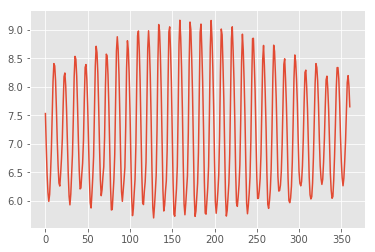

In [4]:
plt.plot(flow.WD[:,2000])

In [2]:
name_textfile_load = 'D:/Use_case_Schouwen/flow_Noos_Utides'

with open(name_textfile_load, 'rb') as input:
    flow = pickle.load(input)

In [3]:
x_r = np.arange(3.2,3.8, 0.001)
y_r = np.arange(51,52, 0.01)
y_r, x_r = np.meshgrid(y_r,x_r)

WD_r2 = griddata((flow.nodes[:,1], flow.nodes[:,0]), flow.WD[46], (x_r, y_r), method= 'linear')

koppelpunt = [3.680414309976414,51.71550093282213]
winlocatie = [3.522637481591586,51.76880095558772]

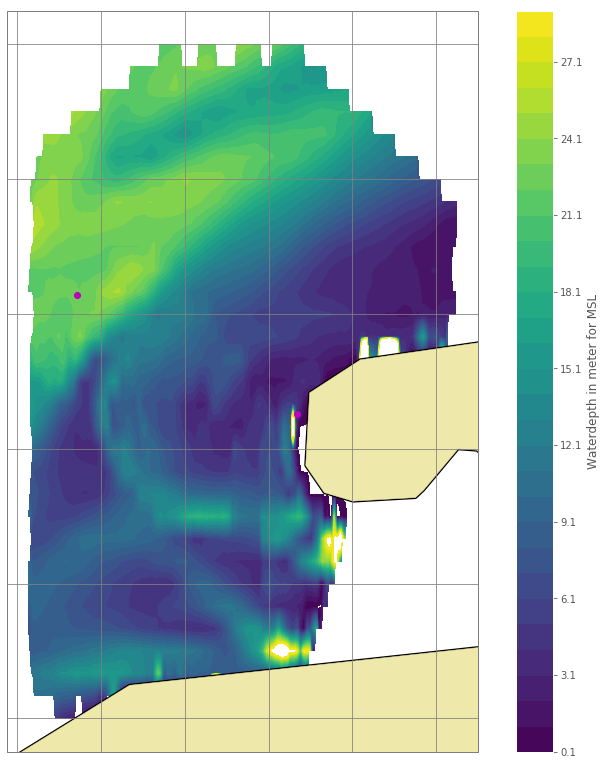

In [4]:
fig = plt.figure(figsize = (30,30))
ax = plt.subplot(2,2,1, projection=ccrs.Mercator())
ax.coastlines(resolution='10m', color='black', linewidth=3)
ax.gridlines(color = 'grey', zorder = 3)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))

cval = np.arange(0.1,30)
plt.contourf(x_r,y_r,WD_r2,cval, transform=ccrs.PlateCarree())
cbar = plt.colorbar()
cbar.set_label('Waterdepth in meter for MSL')

plt.plot(koppelpunt[0],koppelpunt[1], 'mo', transform=ccrs.PlateCarree())
plt.plot(winlocatie[0],winlocatie[1], 'mo', transform=ccrs.PlateCarree())
#plt.plot(flow.nodes[5562,1],flow.nodes[5562,0], 'mo', transform=ccrs.PlateCarree())

plt.show()

[51.71587753  3.68003225]
5287


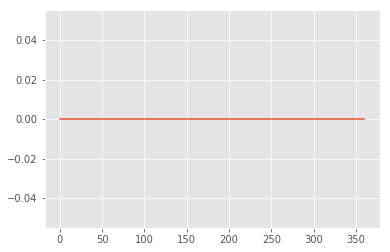

In [5]:
Q = halem.Calc_path.find_startstop(koppelpunt[::-1], flow.nodes)
plt.plot(flow.WD[:,Q])
print(flow.nodes[Q,:])
print(len(flow.nodes))

In [6]:
flow.nodes.shape

(5287, 2)